In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


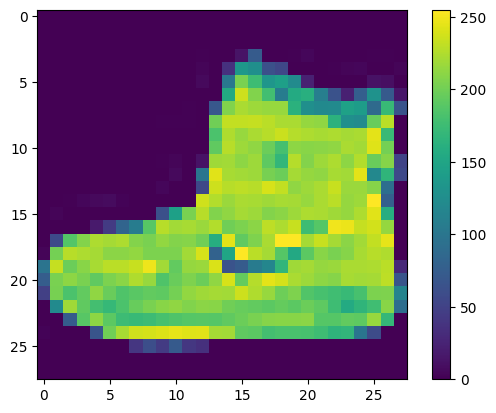

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

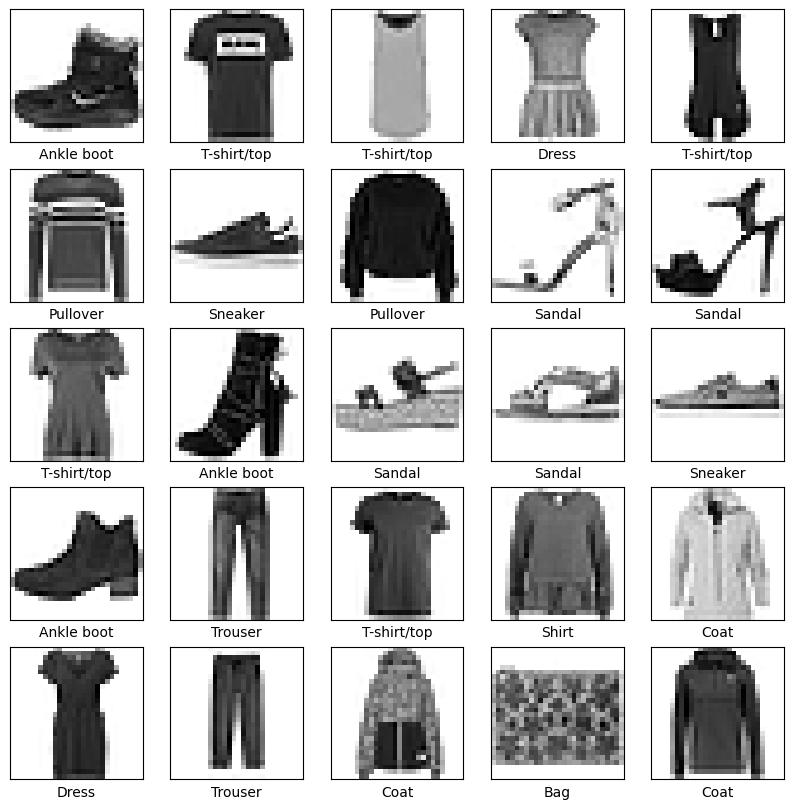

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
import json

In [ ]:
params = {
    "filters": [8, 10],
    "kernel_size": [3, 5],
    "stride": [1, 2],
    "padding": ["same", "valid"],
}

In [ ]:
models = []
history1 = []
output = {}
c = 0
with open('/content/drive/MyDrive/Colab Notebooks/output-max.json', 'w') as fl: 
  
  for f in params['filters']:
    for k in params['kernel_size']:
      for s in params['stride']:
        for p in params['padding']:
          model = keras.Sequential([
              keras.layers.Conv2D(filters=f, kernel_size=(k, k), activation='relu', input_shape=(28, 28, 1)),
              keras.layers.MaxPooling2D(),
              keras.layers.Conv2D(filters=f*2, kernel_size=(k, k), activation='relu', strides=s, padding = p),
              keras.layers.MaxPooling2D(),
              keras.layers.Flatten(), 
              keras.layers.Dense(100, activation = 'relu'),
              keras.layers.Dense(50, activation = 'relu'),
              keras.layers.Dense(10, activation = 'softmax')
          ])
          models.append(model)
          model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
          hist = model.fit(train_images, train_labels, epochs=10)
          loss, accuracy = model.evaluate(test_images, test_labels)
          out = {"model": c, "filters":f, "kernel_size": k, "stride": s, "padding": p, "accuracy": accuracy, "loss": loss}
          history1.append(hist)
          c += 1
          print(out)
          output[c] = out
  fl.write(json.dumps(output))
  fl.close()

Epoch 1/10
1559/1875 [=======================>......] - ETA: 1s - loss: 0.5361 - accuracy: 0.8027

KeyboardInterrupt: ignored

In [ ]:
models_2 = []
output2 = {}
history2 = []
c = 0
with open('/content/drive/MyDrive/Colab Notebooks/output-avg.json', 'w') as fl: 
  for f in params['filters']:
    for k in params['kernel_size']:
      for s in params['stride']:
        for p in params['padding']:
          model = keras.Sequential([
              keras.layers.Conv2D(filters=f, kernel_size=(k, k), activation='relu', input_shape=(28, 28, 1)),
              keras.layers.AveragePooling2D(),
              keras.layers.Conv2D(filters=f*2, kernel_size=(k, k), activation='relu', strides=s, padding = p),
              keras.layers.AveragePooling2D(),
              keras.layers.Flatten(), 
              keras.layers.Dense(100, activation = 'relu'),
              keras.layers.Dense(50, activation = 'relu'),
              keras.layers.Dense(10, activation = 'softmax')
          ])
          models_2.append(model)
          model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
          hist = model.fit(train_images, train_labels, epochs=10)
          loss, accuracy = model.evaluate(test_images, test_labels)
          out = {"model": c, "filters":f, "kernel_size": k, "stride": s, "padding": p, "accuracy": accuracy, "loss": loss}
          c += 1
          history2.append(hist)
          print(out)
          output2[c] = out
  fl.write(json.dumps(output2))
  fl.close()

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5675 - accuracy: 0.7926
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3853 - accuracy: 0.8597
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3294 - accuracy: 0.8791
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2975 - accuracy: 0.8909
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2735 - accuracy: 0.8994
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2566 - accuracy: 0.9054
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2414 - accuracy: 0.9110
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2278 - accuracy: 0.9151
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2158 - accuracy: 0.9196
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2690 

In [ ]:
models_3 = []
output3 = {}
history3 = []
c = 0
with open('/content/drive/MyDrive/Colab Notebooks/output-leaky.json', 'w') as fl: 
  for f in params['filters']:
    for k in params['kernel_size']:
      for s in params['stride']:
        for p in params['padding']:
          model = keras.Sequential([
              keras.layers.Conv2D(filters=f, kernel_size=(k, k), input_shape=(28, 28, 1)),
              keras.layers.LeakyReLU(alpha=0.3),
              keras.layers.MaxPooling2D(),
              keras.layers.Conv2D(filters=f*2, kernel_size=(k, k), strides=s, padding = p),
              keras.layers.LeakyReLU(alpha=0.3),
              keras.layers.MaxPooling2D(),
              keras.layers.Flatten(), 
              keras.layers.Dense(100),
              keras.layers.LeakyReLU(alpha=0.3),
              keras.layers.Dense(50),
              keras.layers.LeakyReLU(alpha=0.3),
              keras.layers.Dense(10, activation = 'softmax')
          ])
          models_3.append(model)
          model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
          hist = model.fit(train_images, train_labels, epochs=10)
          loss, accuracy = model.evaluate(test_images, test_labels)
          out = {"model": c, "filters":f, "kernel_size": k, "stride": s, "padding": p, "accuracy": accuracy, "loss": loss}
          c += 1
          history3.append(hist)
          print(out)
          output3[c] = out
  fl.write(json.dumps(output3))
  fl.close()

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4859 - accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3316 - accuracy: 0.8791
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2880 - accuracy: 0.8947
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2601 - accuracy: 0.9037
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2433 - accuracy: 0.9108
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2254 - accuracy: 0.9162
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2124 - accuracy: 0.9209
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2002 - accuracy: 0.9256
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1895 - accuracy: 0.9289
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2768 

In [ ]:
test_history_acc = []
test_history_loss = []
for i in range(1,17):
  test_history_acc.append(output2[i]['accuracy'])
  test_history_loss.append(output2[i]['loss'])
print(test_history_acc, test_history_loss)
print(len(test_history_acc), len(test_history_loss))

[0.9057999849319458, 0.8999000191688538, 0.8736000061035156, 0.8891000151634216, 0.892799973487854, 0.9025999903678894, 0.8791999816894531, 0.8680999875068665, 0.9103000164031982, 0.9021999835968018, 0.8779000043869019, 0.8853999972343445, 0.9031000137329102, 0.895799994468689, 0.8942999839782715, 0.8756999969482422] [0.26896366477012634, 0.28225141763687134, 0.3533579409122467, 0.3079257309436798, 0.2909819483757019, 0.2793366014957428, 0.3449358642101288, 0.3670944273471832, 0.2494325190782547, 0.279739648103714, 0.33610042929649353, 0.32219773530960083, 0.2665206491947174, 0.2830628752708435, 0.29381465911865234, 0.34568095207214355]
16 16


In [ ]:
train_history_acc = []
train_history_loss = []
for i in range(0,16):
  train_history_acc.append(history2[i].history['accuracy'])
  train_history_loss.append(history2[i].history['loss'])
print(train_history_acc, train_history_loss)
print(len(train_history_acc), len(train_history_loss))

[[0.7925833463668823, 0.8596833348274231, 0.8791166543960571, 0.8908666372299194, 0.8993833065032959, 0.9053500294685364, 0.910966694355011, 0.915149986743927, 0.9195666909217834, 0.9231666922569275], [0.7861166596412659, 0.8549666404724121, 0.8738666772842407, 0.8829500079154968, 0.8918833136558533, 0.8974499702453613, 0.902916669845581, 0.9065166711807251, 0.9103000164031982, 0.9152500033378601], [0.7498833537101746, 0.826033353805542, 0.8464000225067139, 0.8607166409492493, 0.869533360004425, 0.8744500279426575, 0.8811833262443542, 0.8830833435058594, 0.8871999979019165, 0.8909500241279602], [0.7693166732788086, 0.8495333194732666, 0.8670666813850403, 0.8767333626747131, 0.8814499974250793, 0.8861666917800903, 0.8906833529472351, 0.8942166566848755, 0.897849977016449, 0.9012500047683716], [0.7870166897773743, 0.8587999939918518, 0.8784999847412109, 0.8895166516304016, 0.8969166874885559, 0.9053166508674622, 0.9101499915122986, 0.9159166812896729, 0.9189333319664001, 0.92261666059494

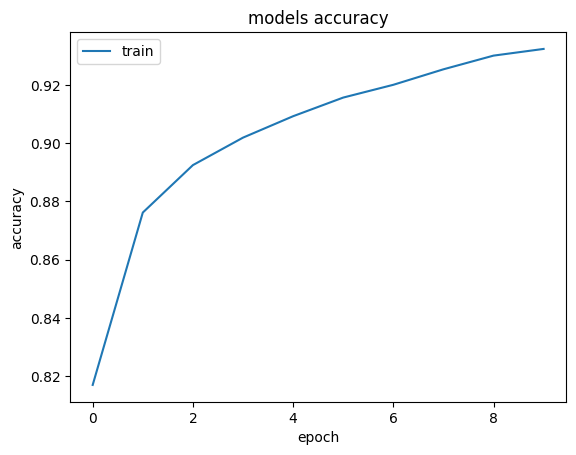

In [ ]:
# summarize history for accuracy
plt.plot(history1[0].history['accuracy'])
plt.title(f"models accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')

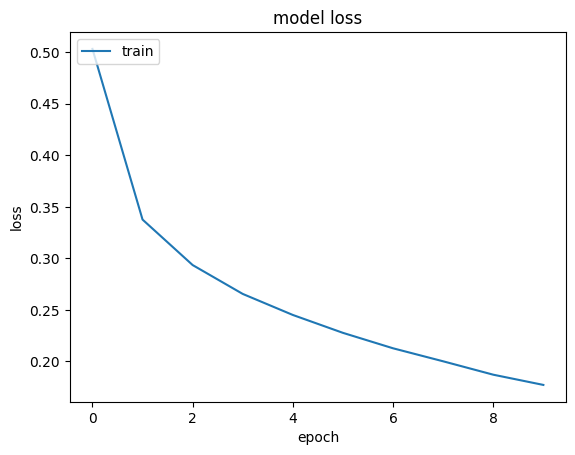

In [ ]:
# summarize history for loss
plt.plot(history1[0].history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

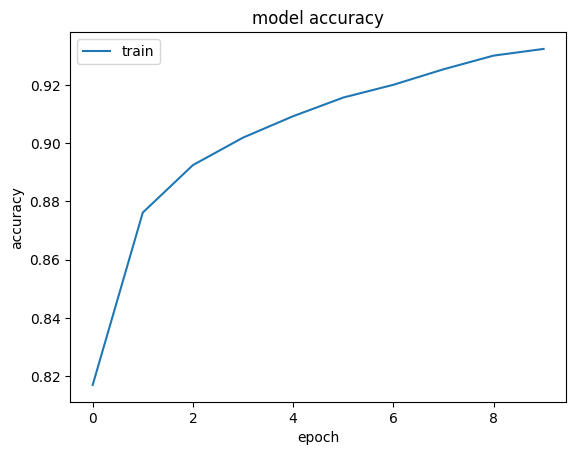

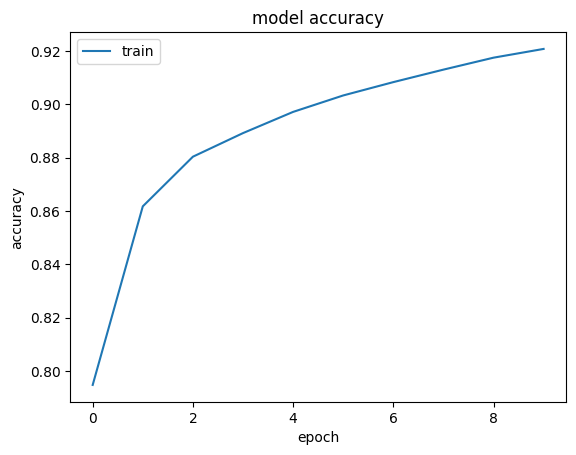

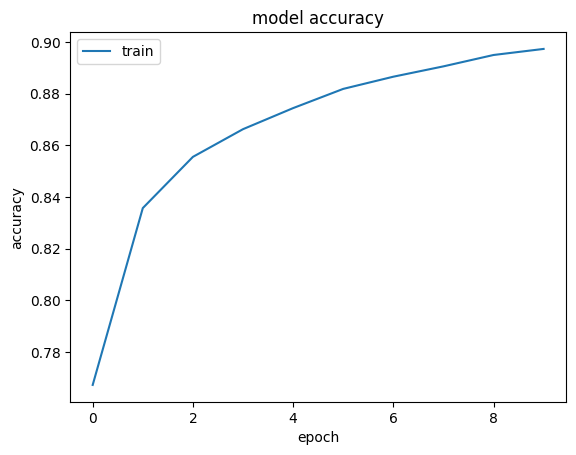

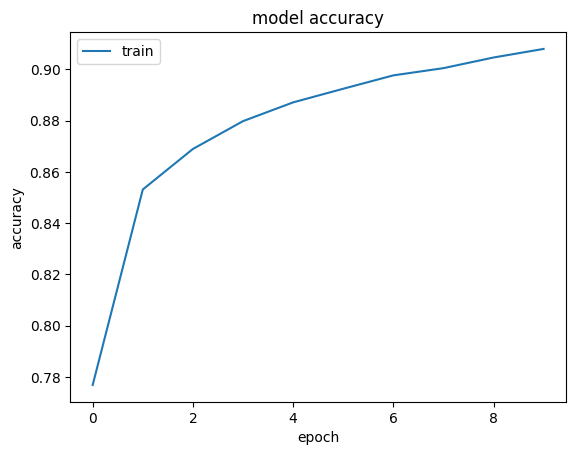

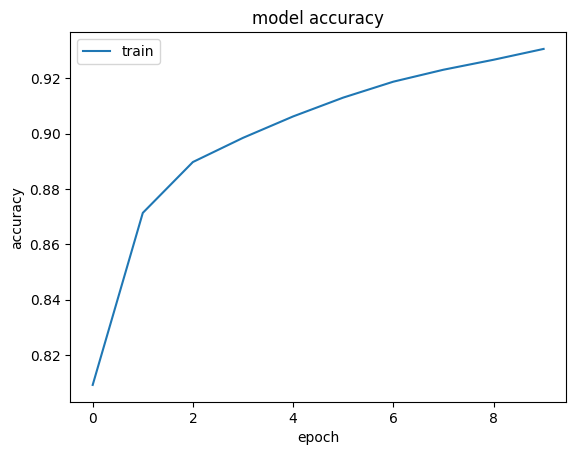

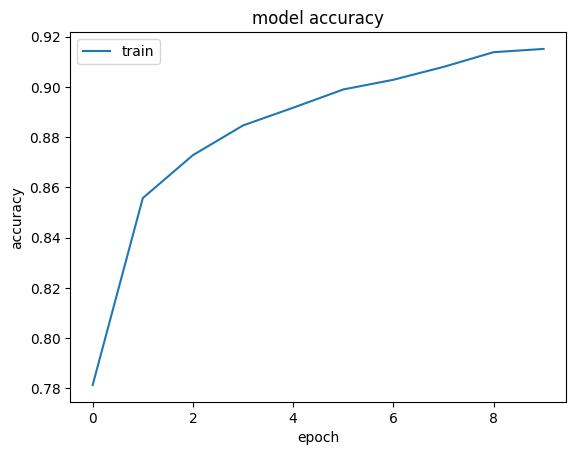

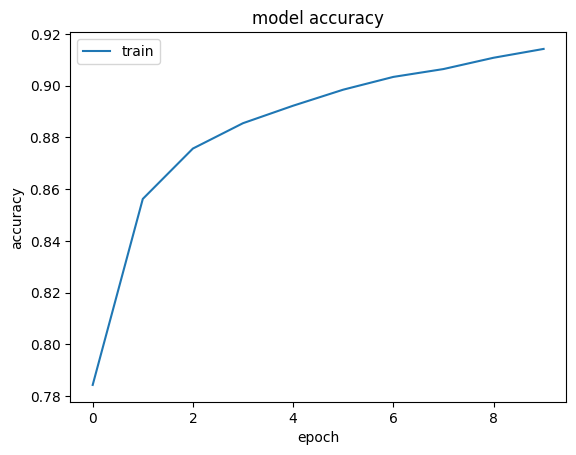

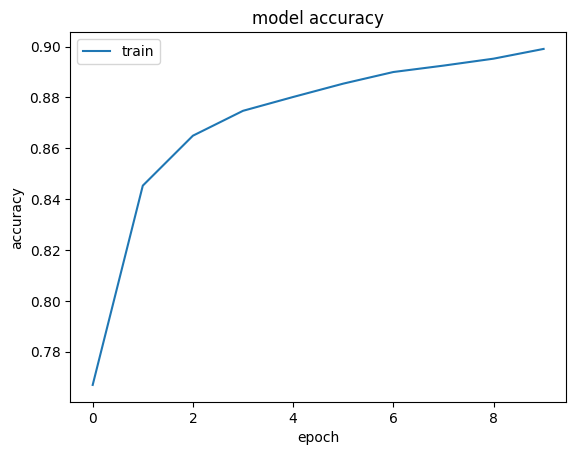

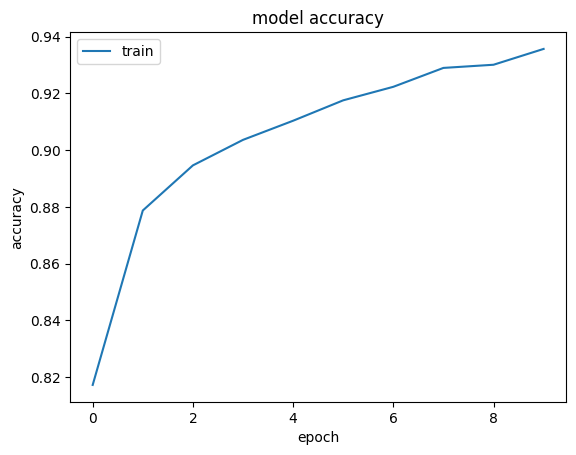

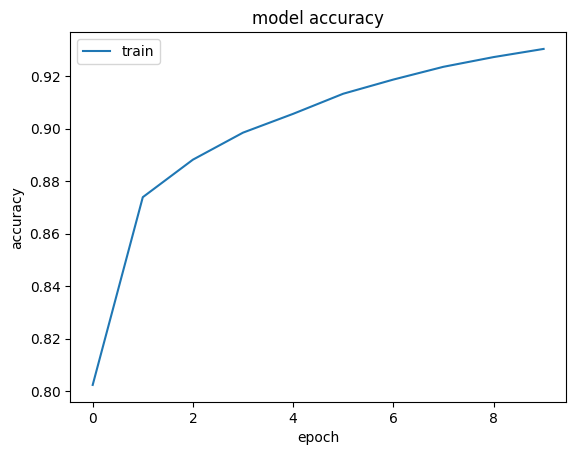

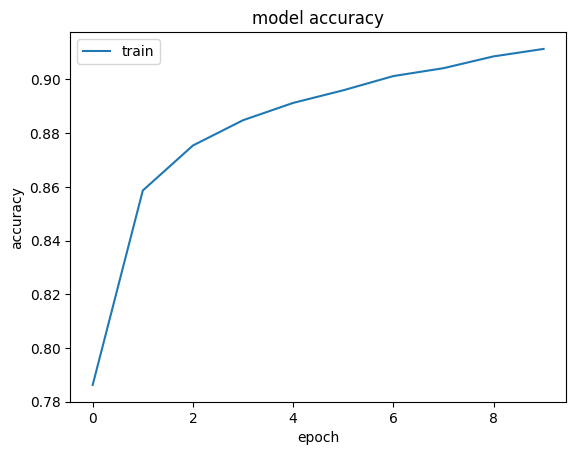

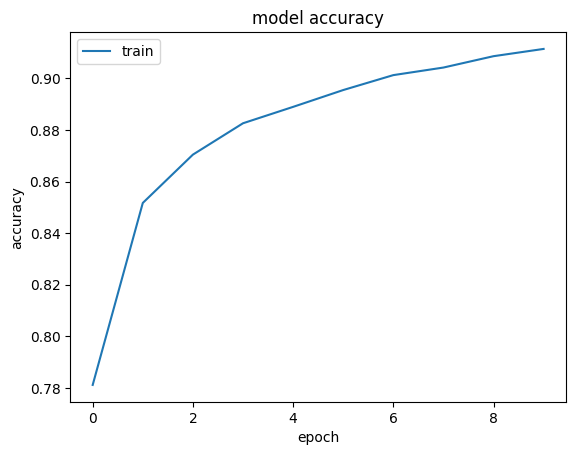

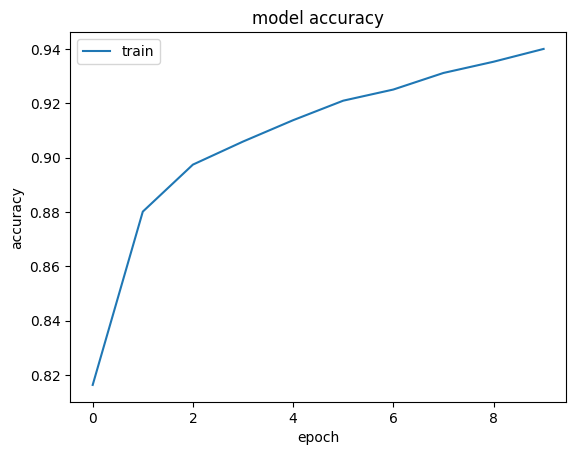

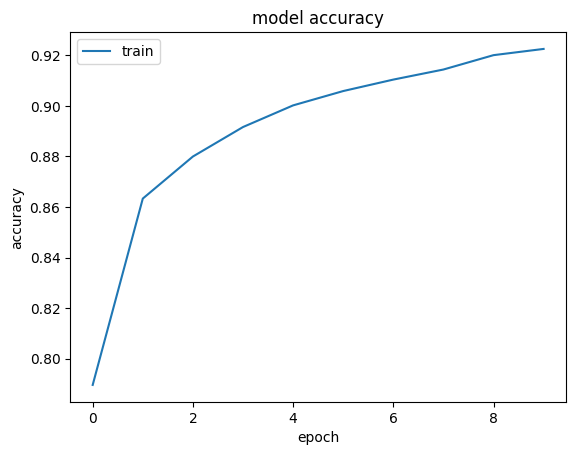

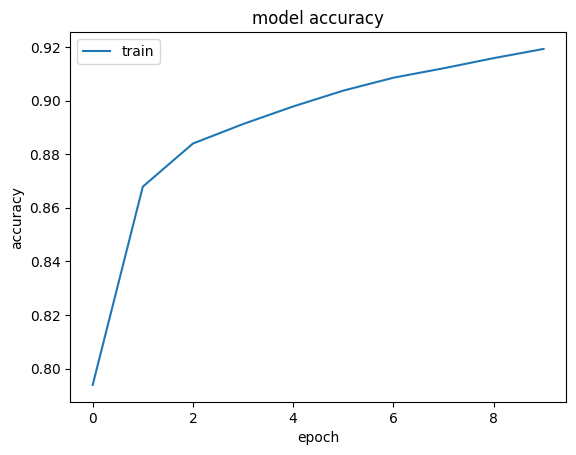

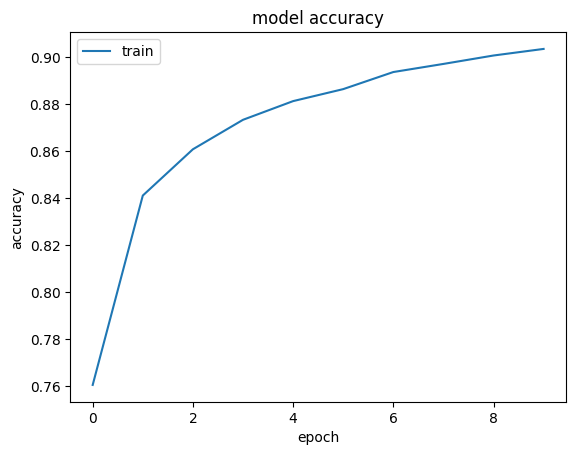

In [ ]:
# summarize history for accuracy
for h in history1:
  plt.plot(h.history['accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
  plt.show()

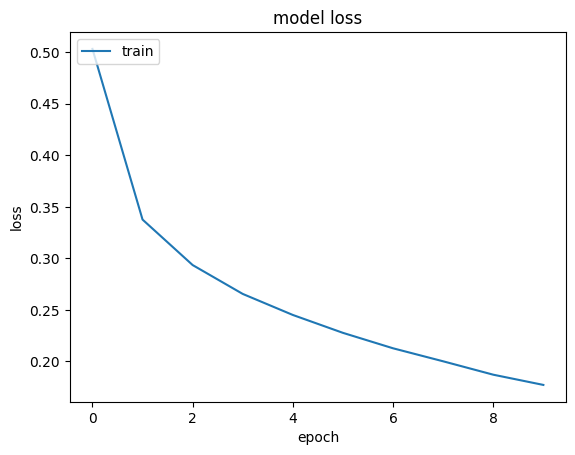

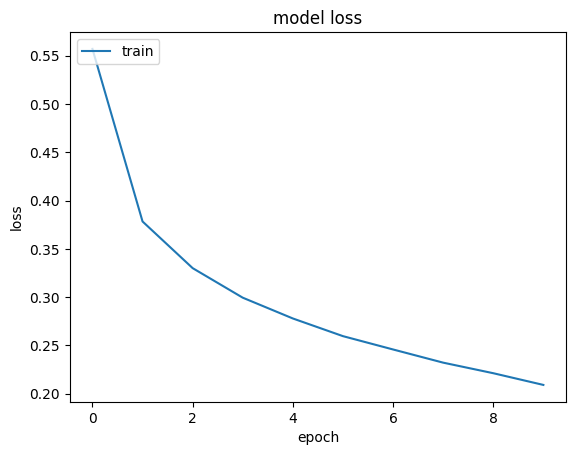

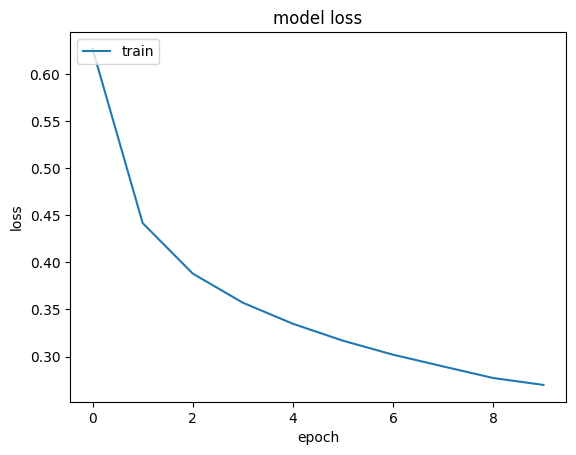

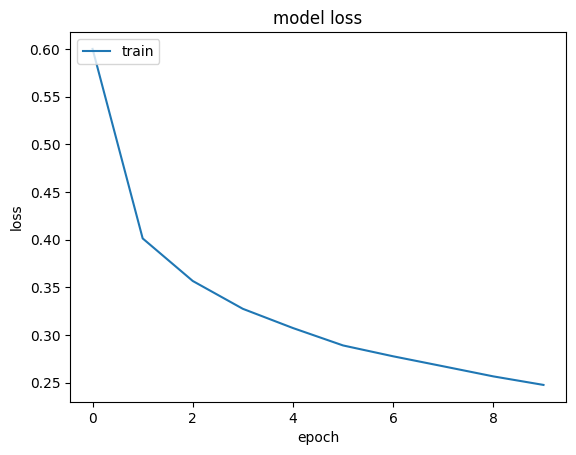

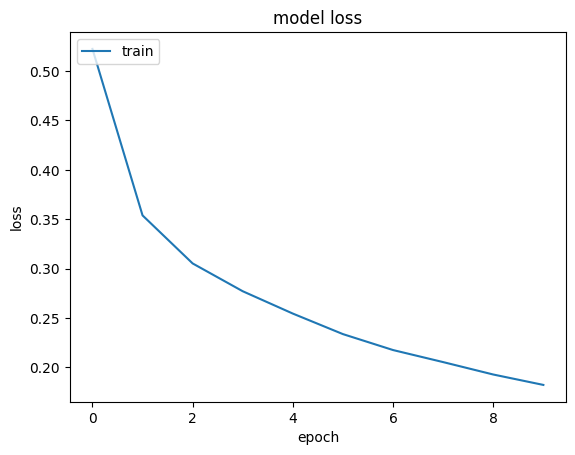

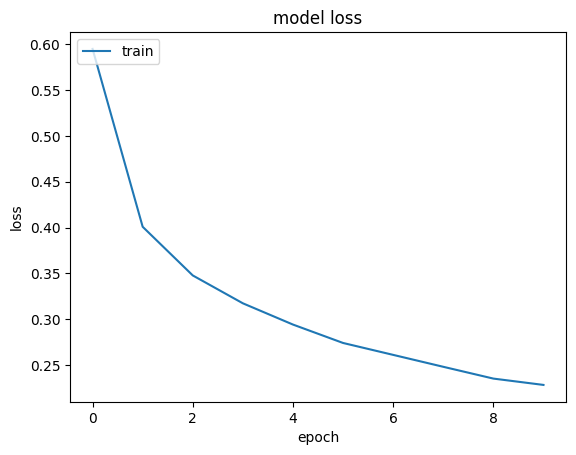

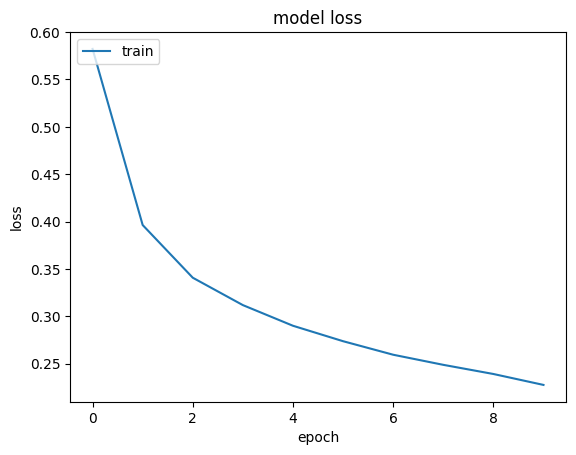

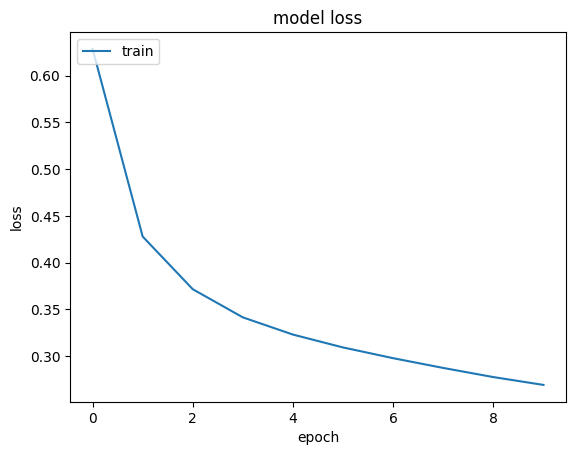

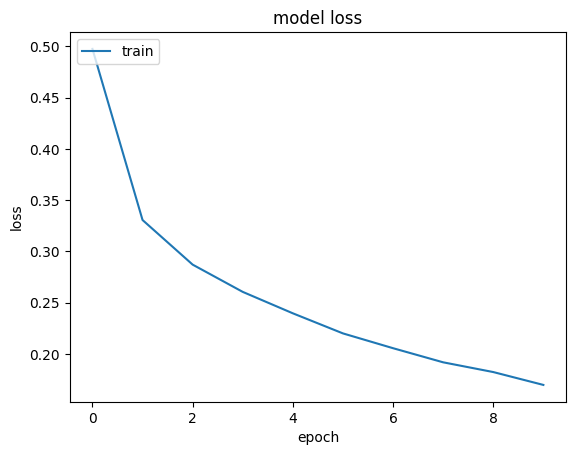

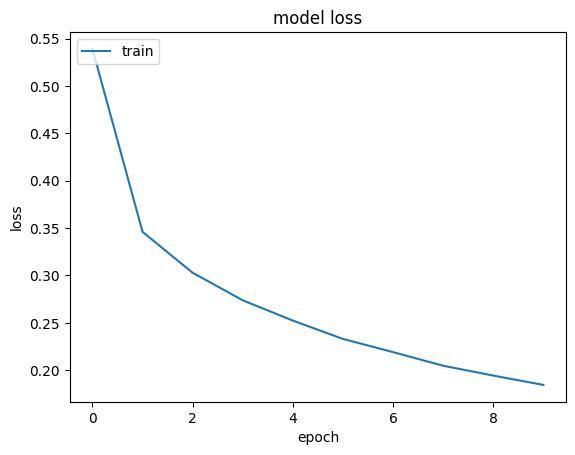

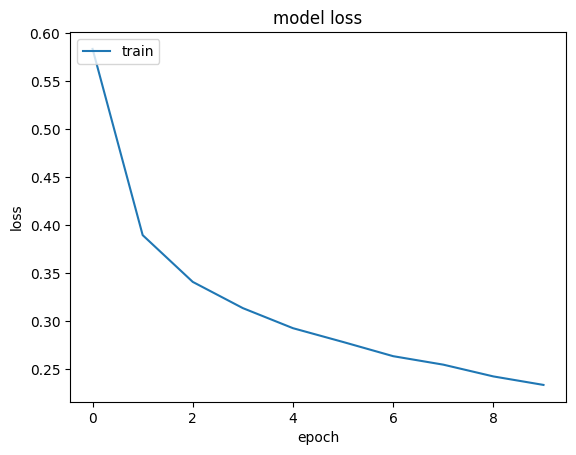

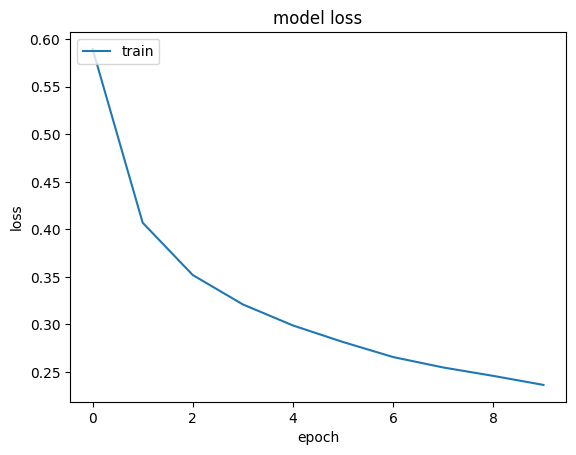

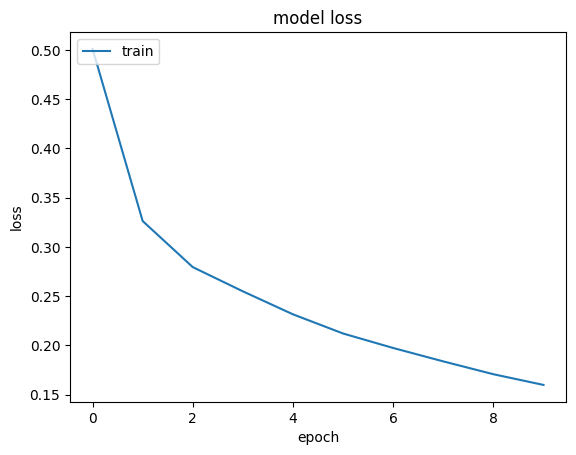

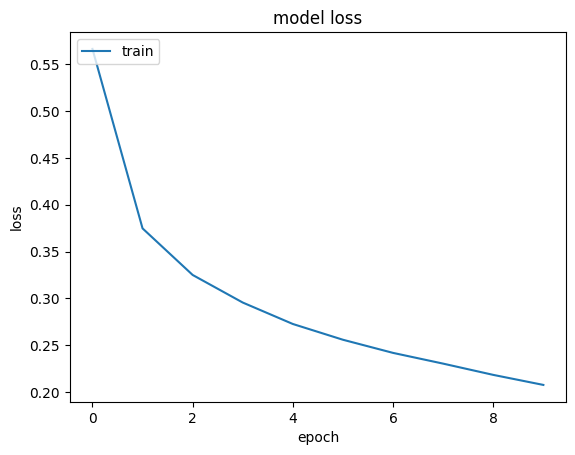

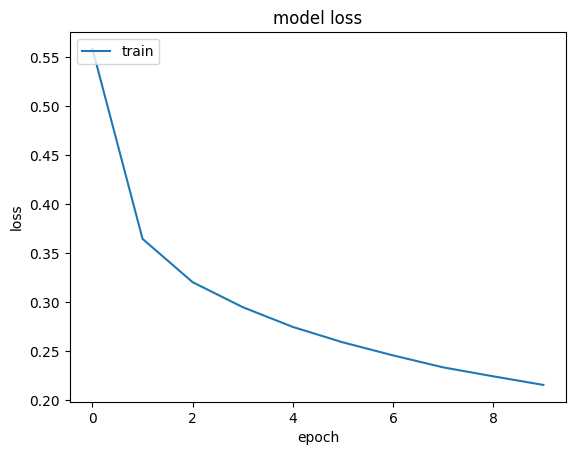

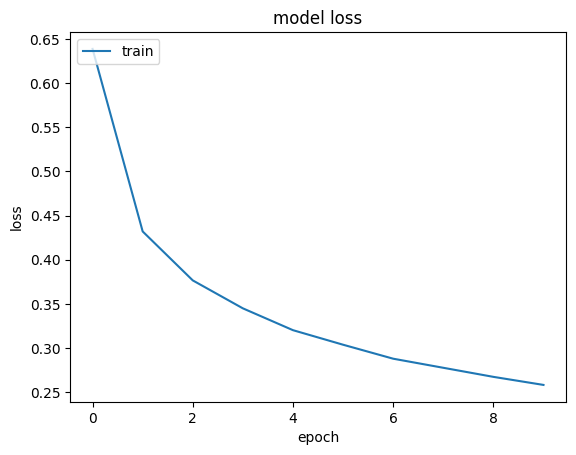

In [ ]:
# summarize history for loaa
for h in history1:
  plt.plot(h.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
  plt.show()

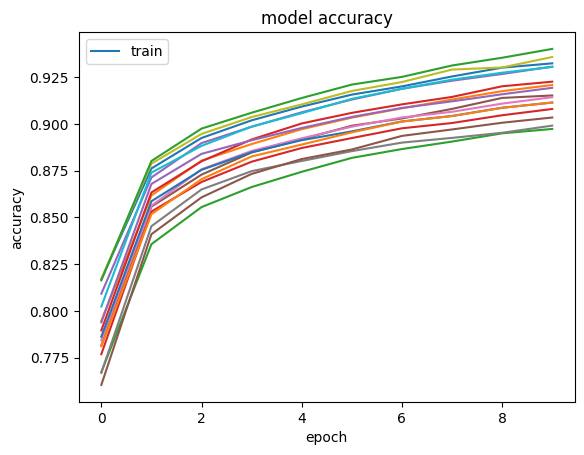

In [ ]:
# Combined graph for histroy2 accuracy
for h in history1:
  plt.plot(h.history['accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
plt.show()

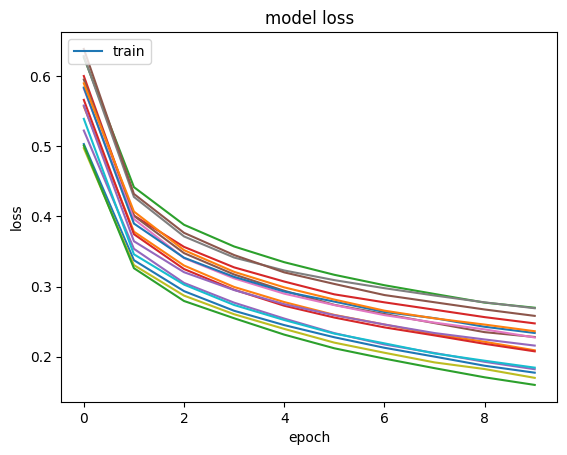

In [ ]:
# Combined graph for histroy2 loss
for h in history1:
  plt.plot(h.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
plt.show()

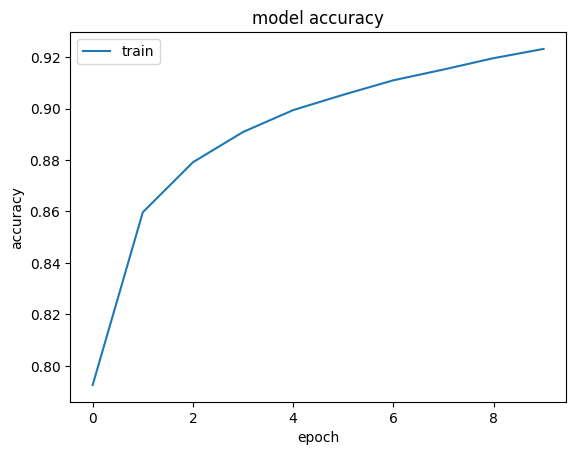

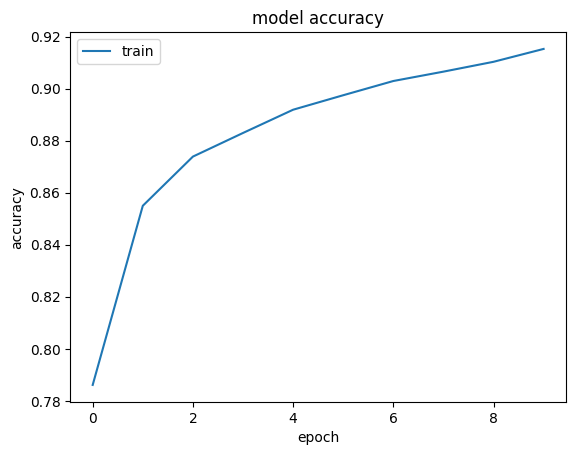

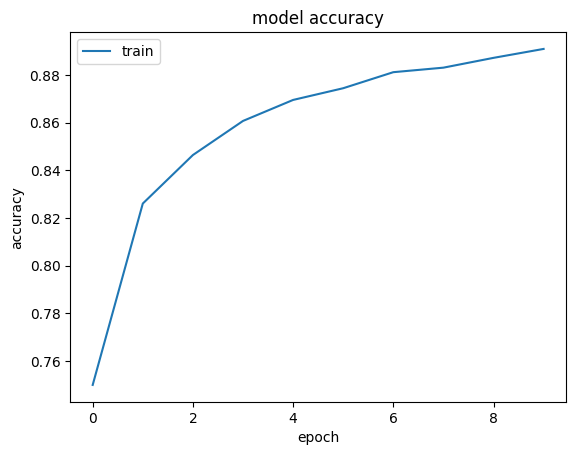

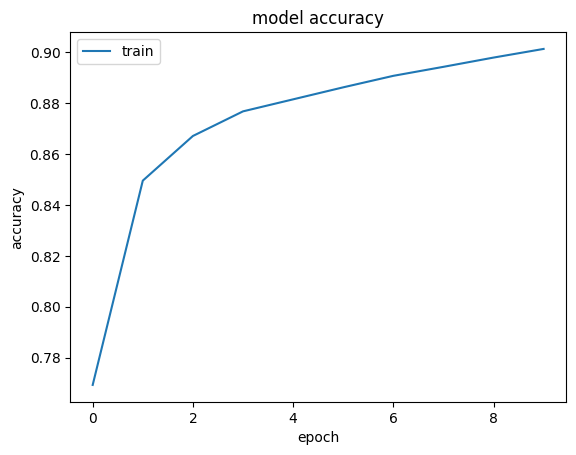

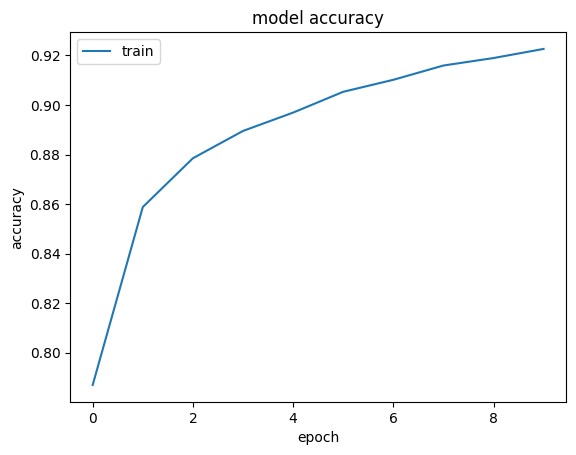

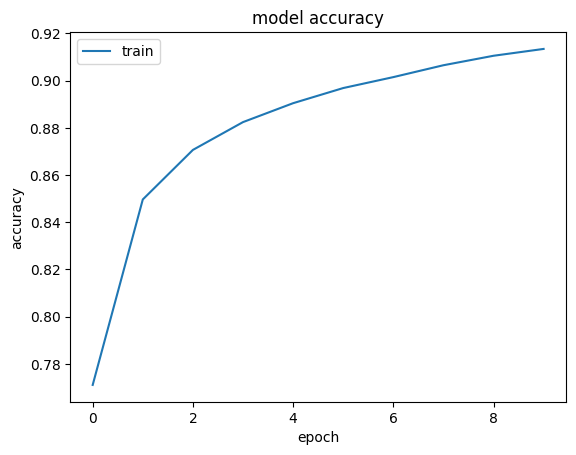

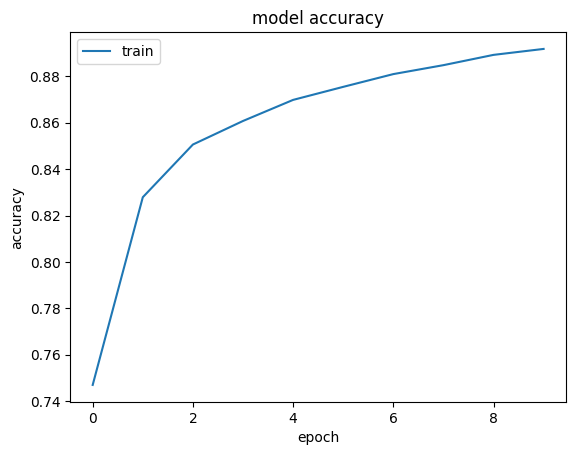

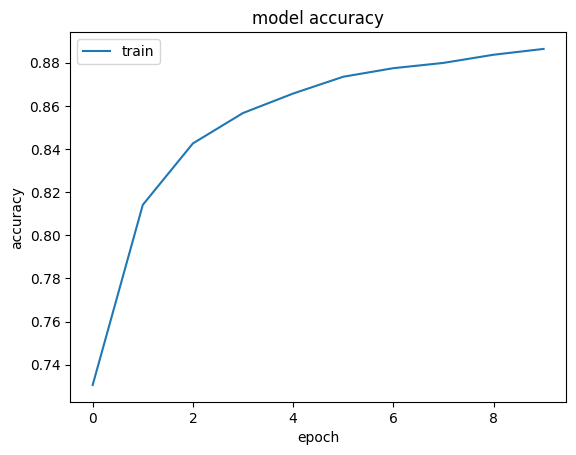

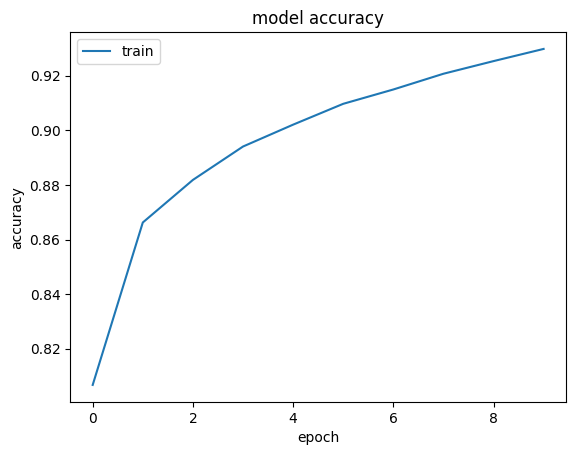

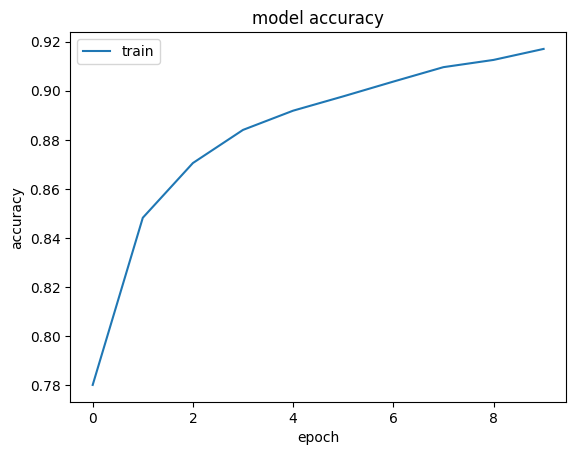

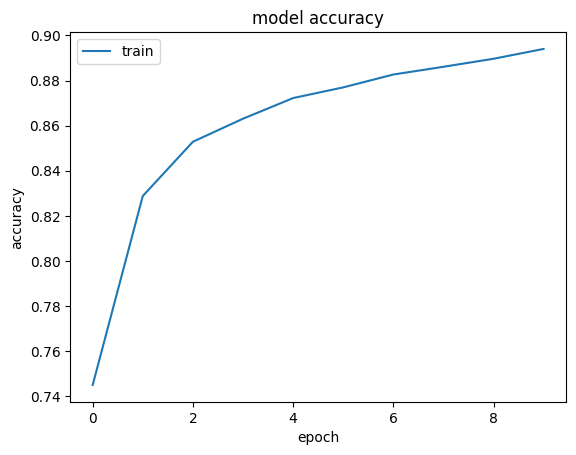

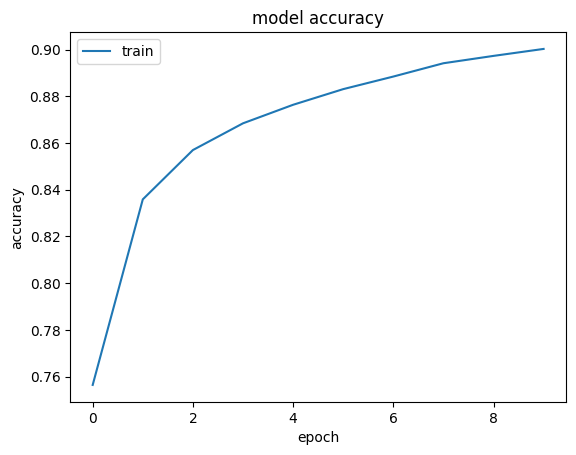

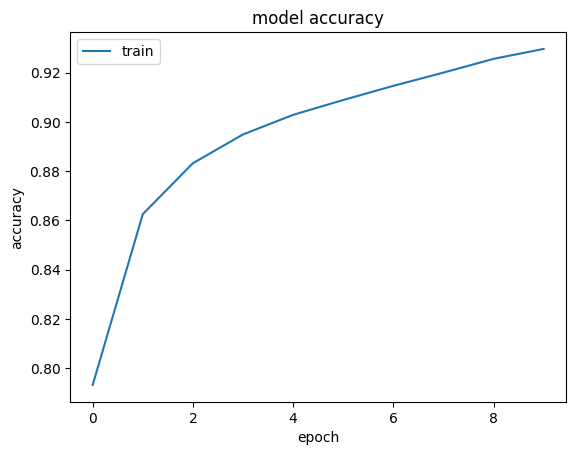

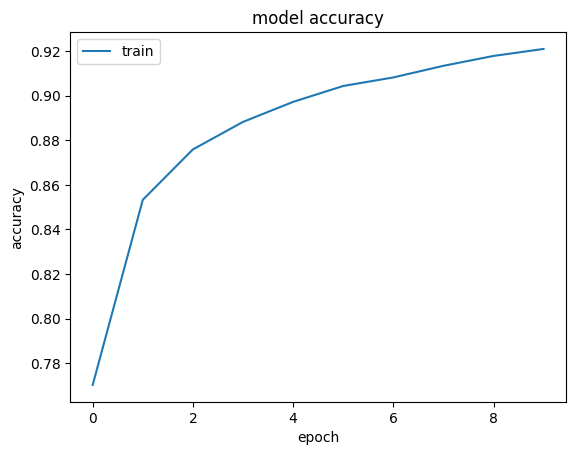

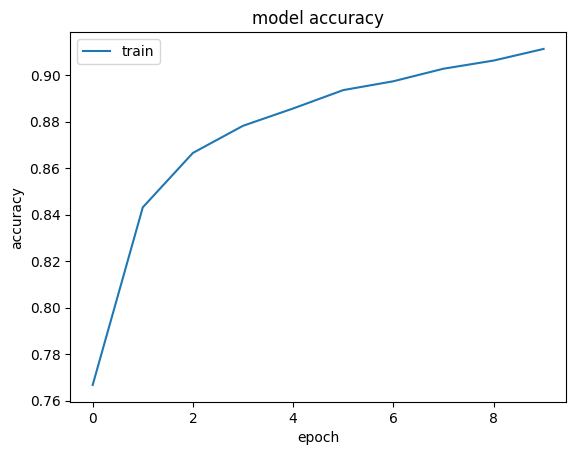

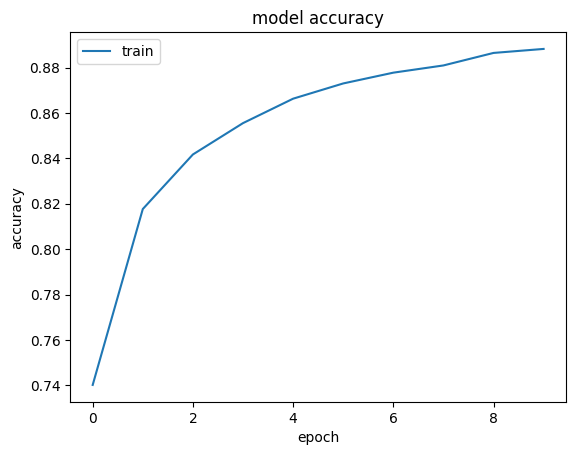

In [ ]:
# summarize history for accuracy
for h in history2:
  plt.plot(h.history['accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
  plt.show()

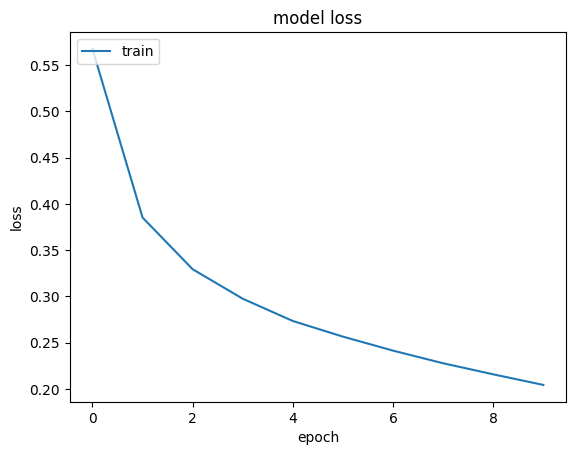

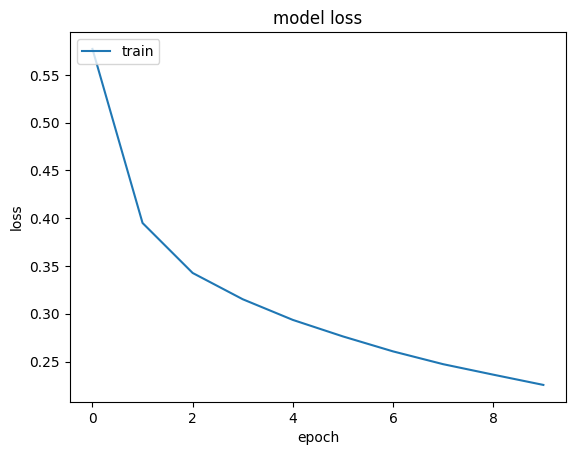

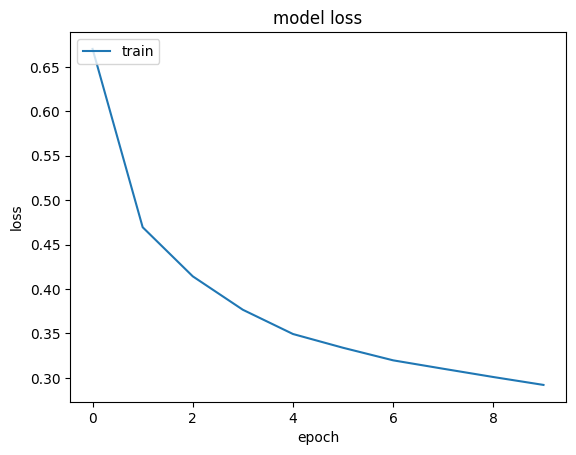

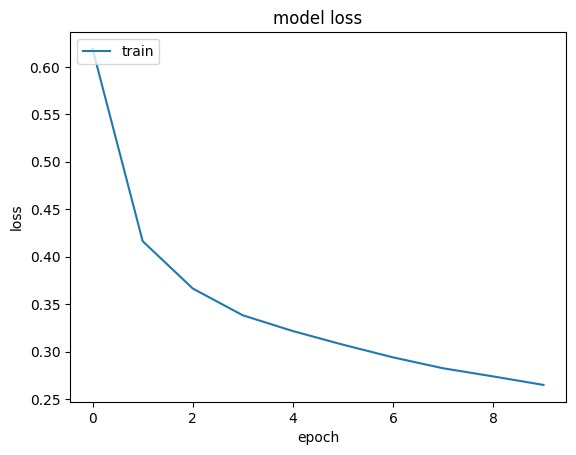

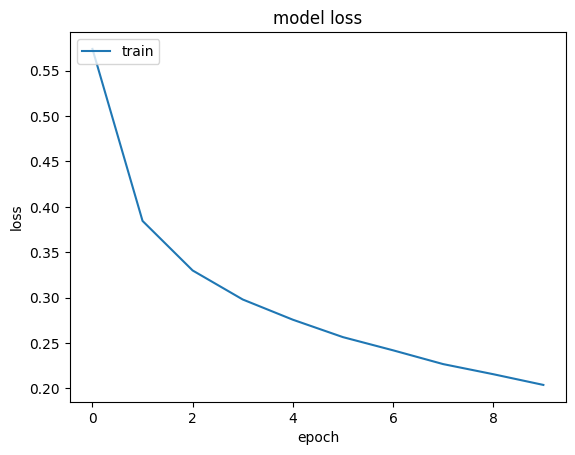

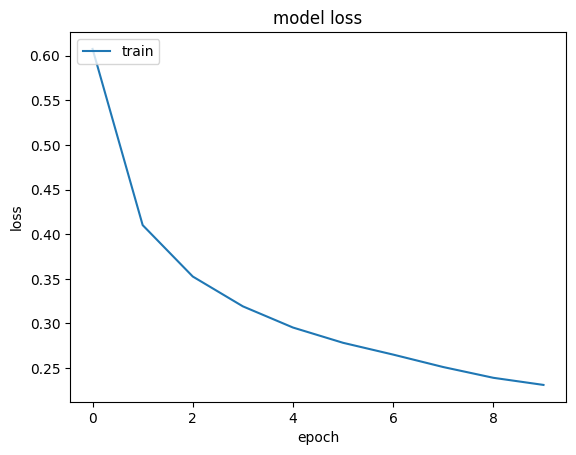

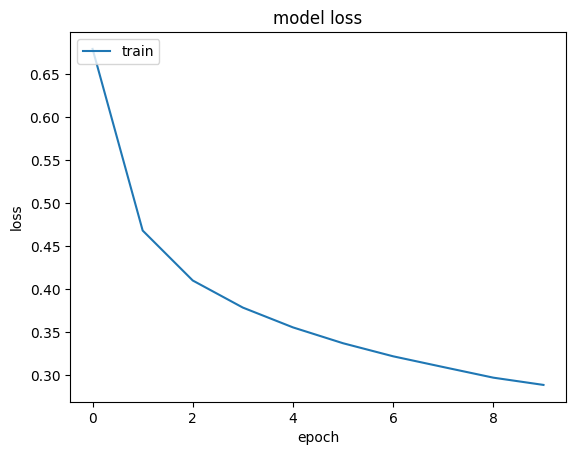

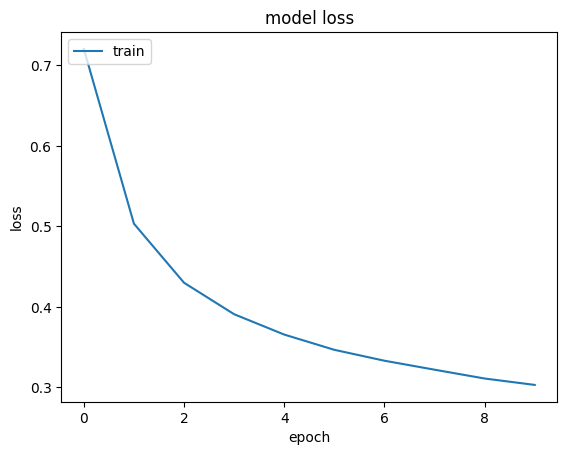

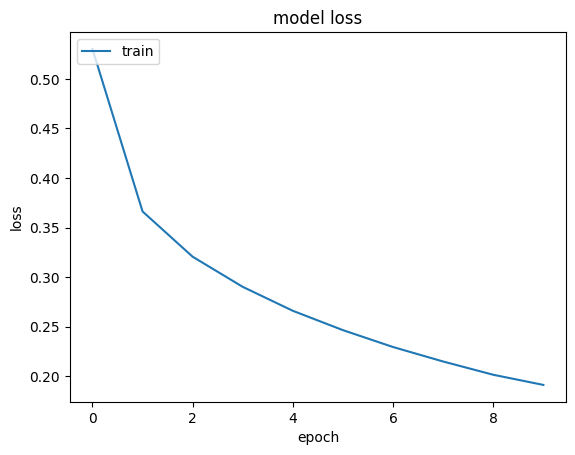

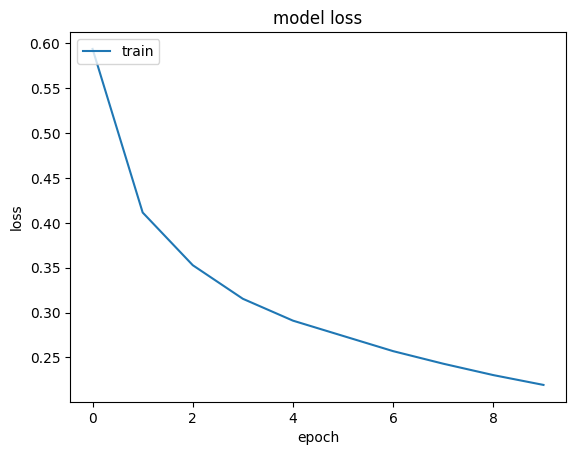

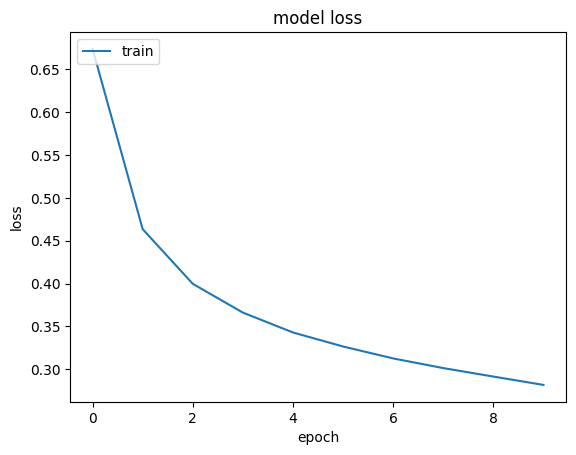

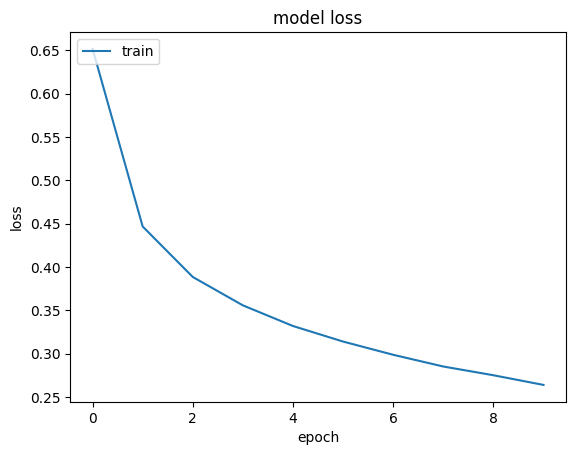

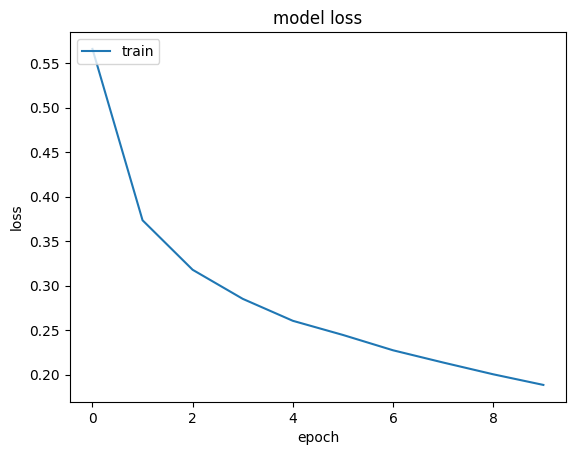

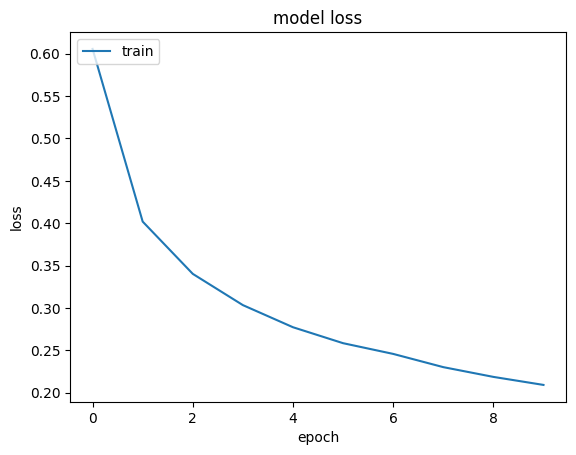

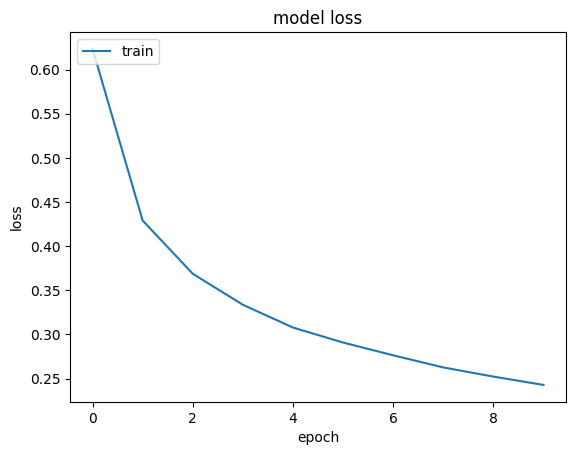

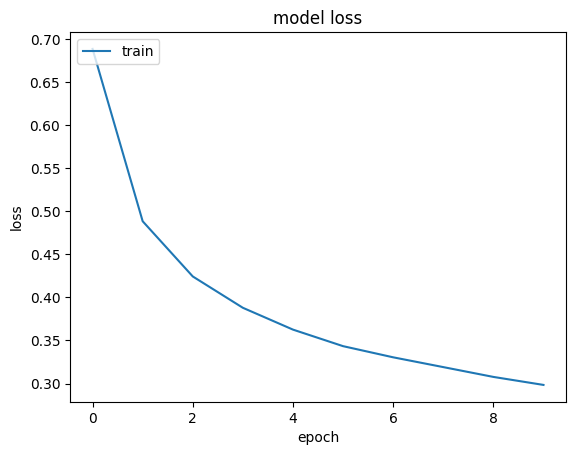

In [ ]:
# summarize history for loss
for h in history2:
  plt.plot(h.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
  plt.show()

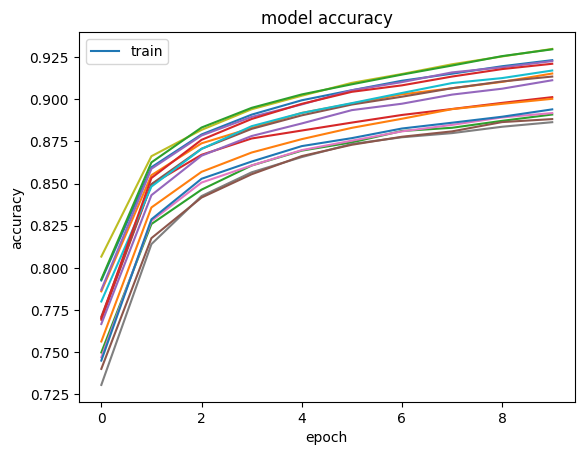

In [ ]:
# Combined graph for histroy2 accuracy
for h in history2:
  plt.plot(h.history['accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
plt.show()

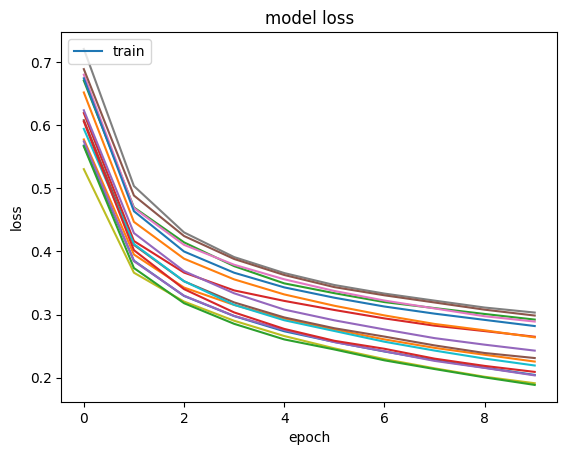

In [ ]:
# Combined graph for histroy2 loss
for h in history2:
  plt.plot(h.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
plt.show()

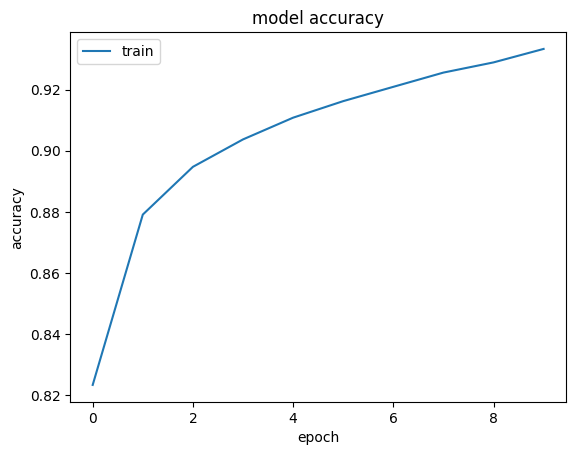

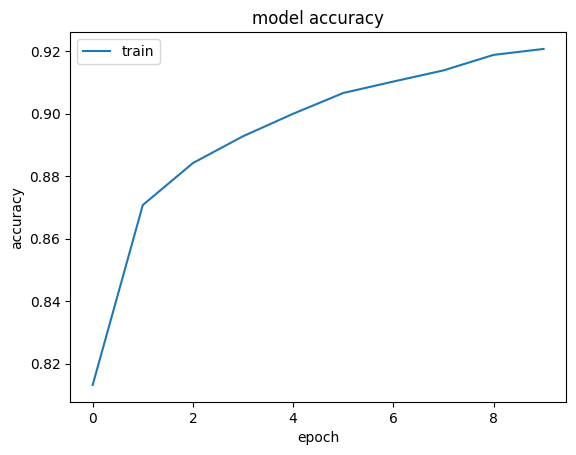

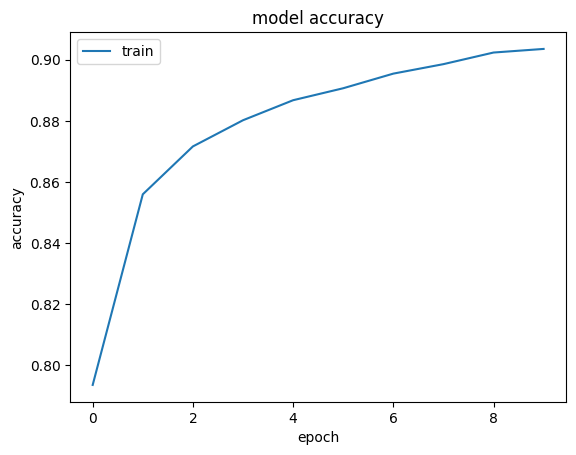

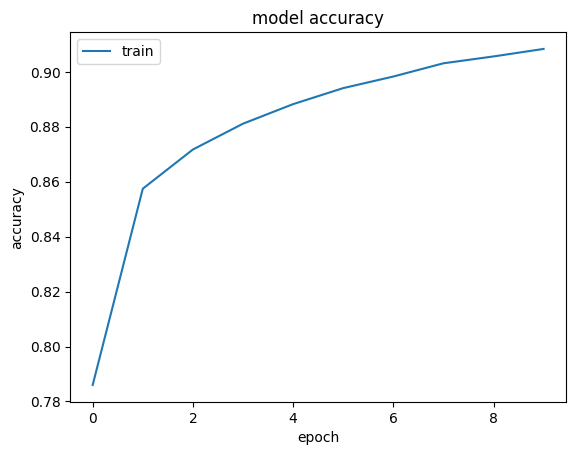

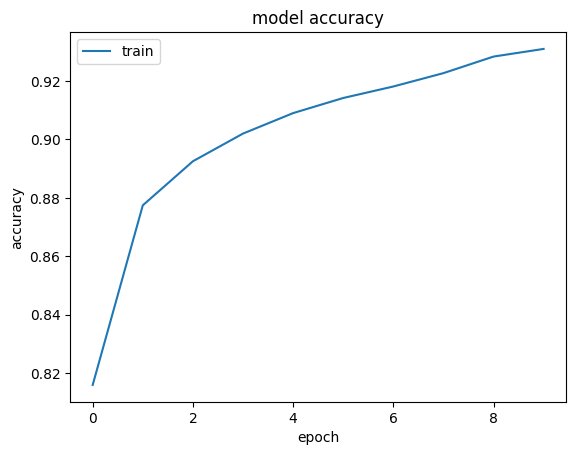

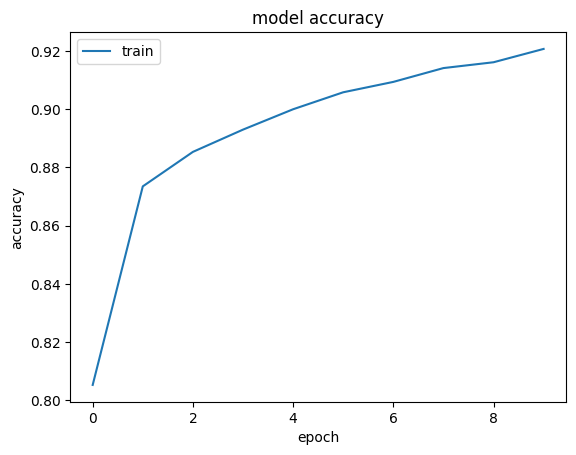

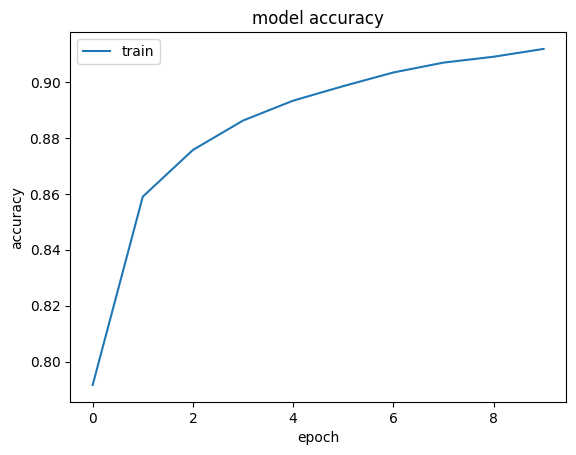

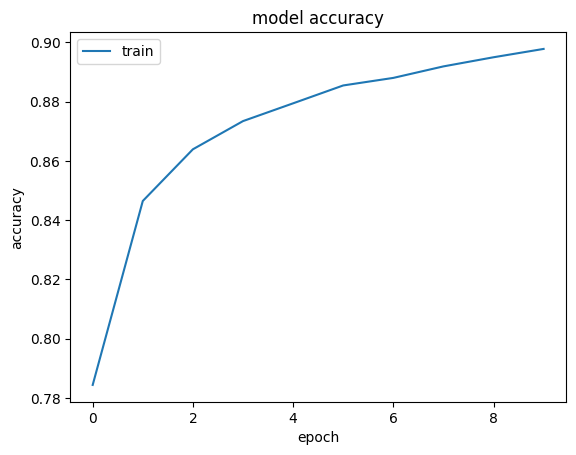

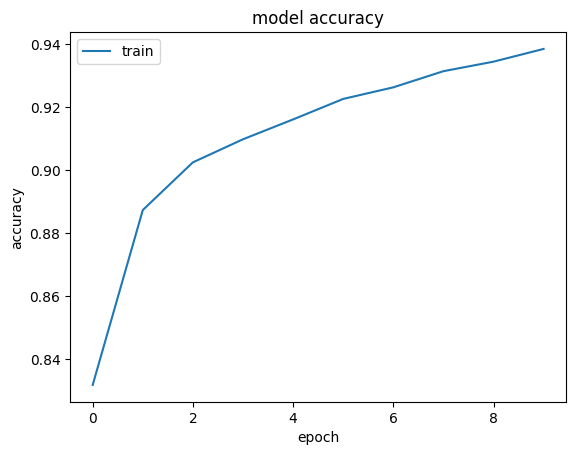

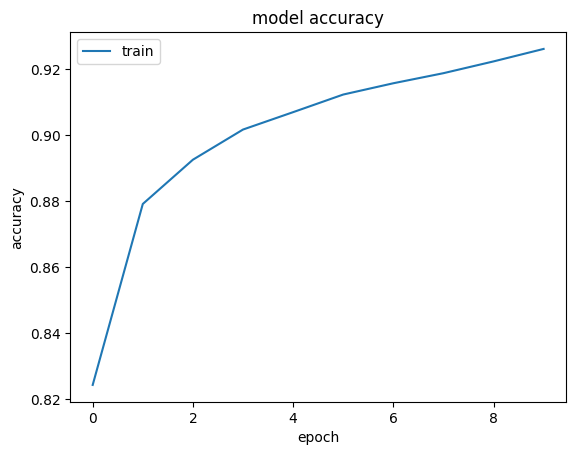

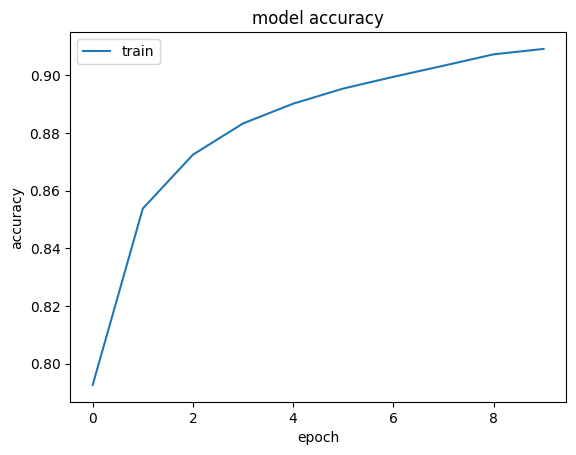

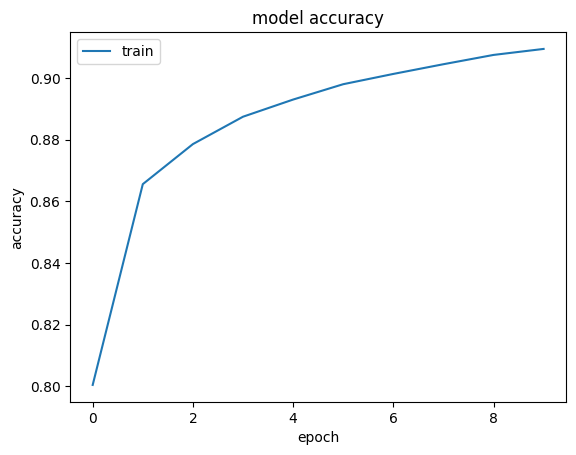

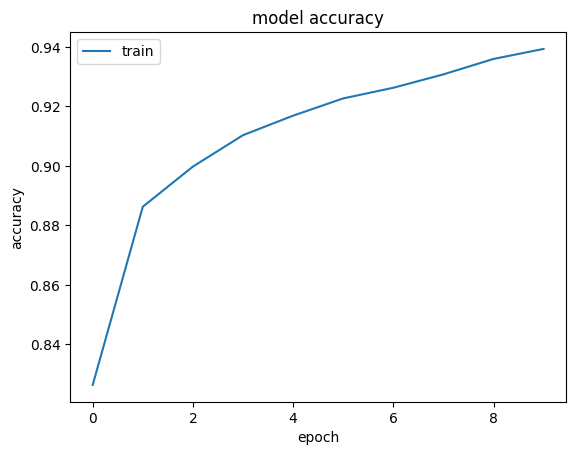

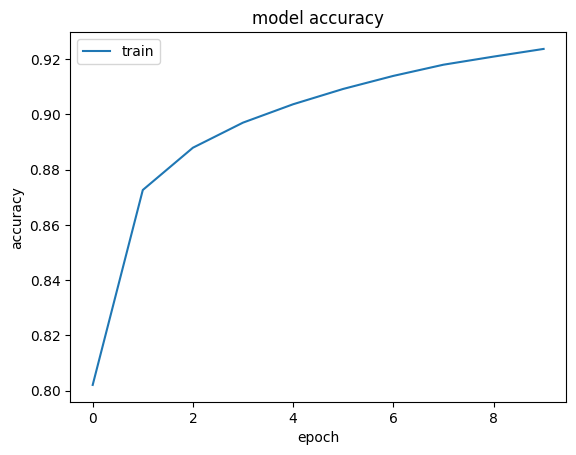

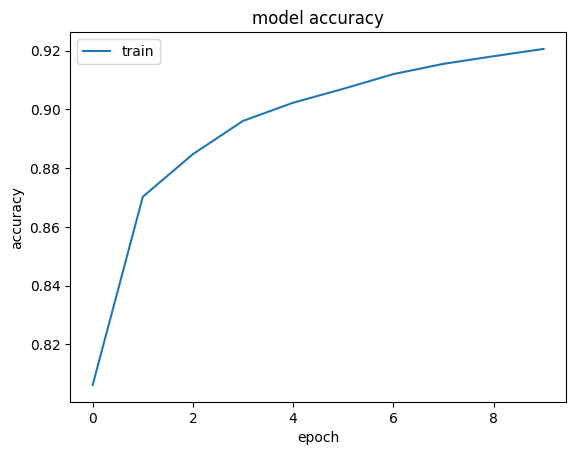

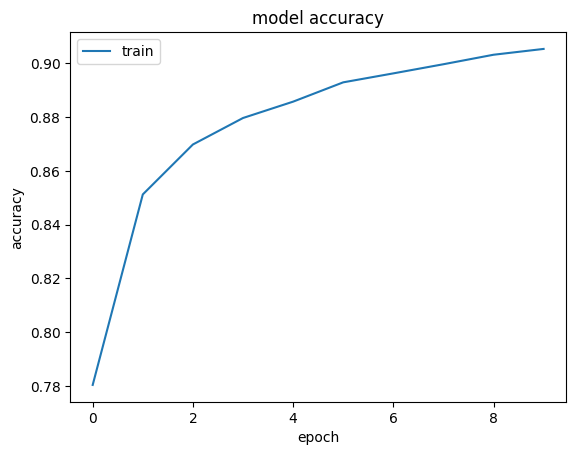

In [ ]:
# summarize history for accuracy
for h in history3:
  plt.plot(h.history['accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
  plt.show()

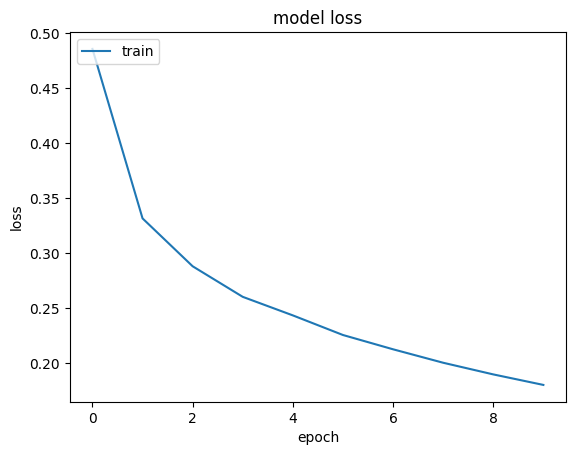

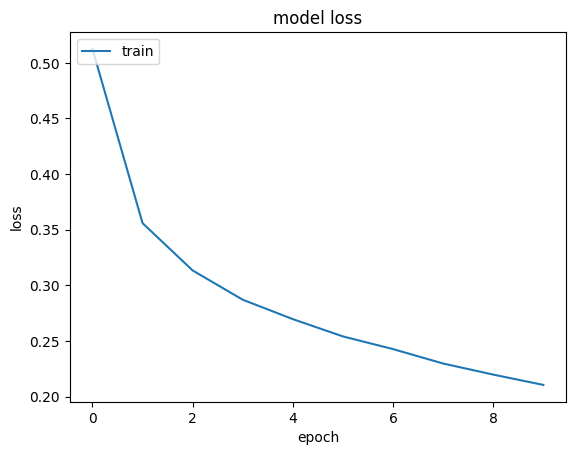

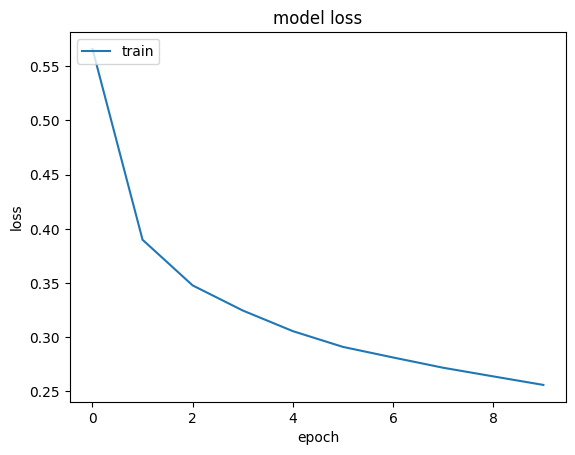

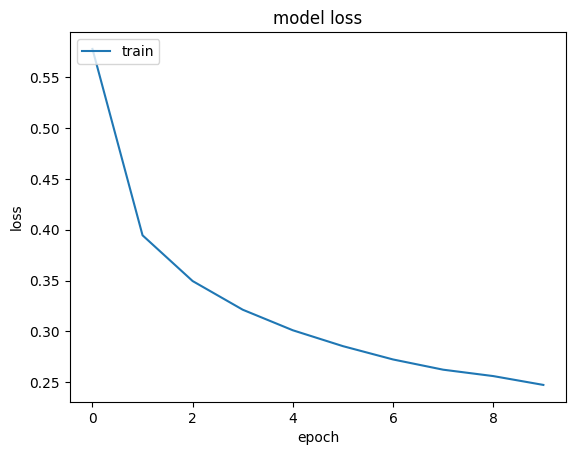

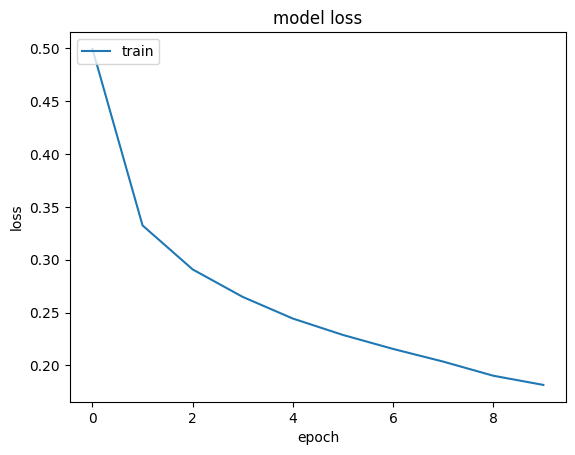

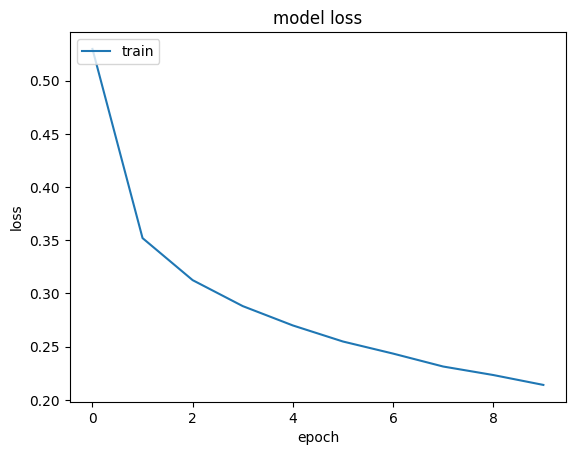

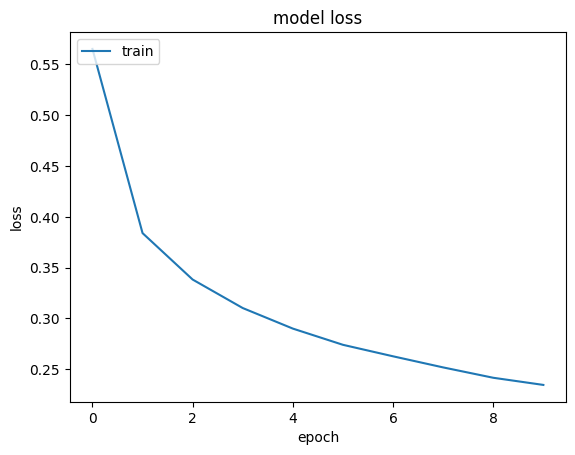

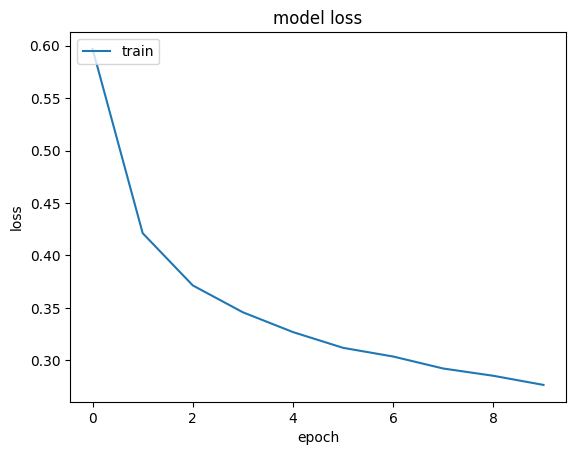

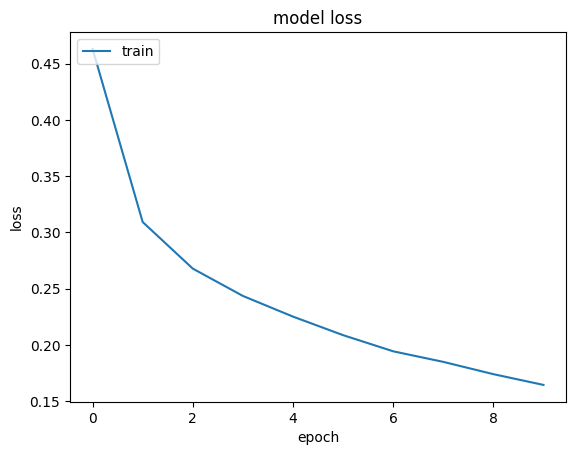

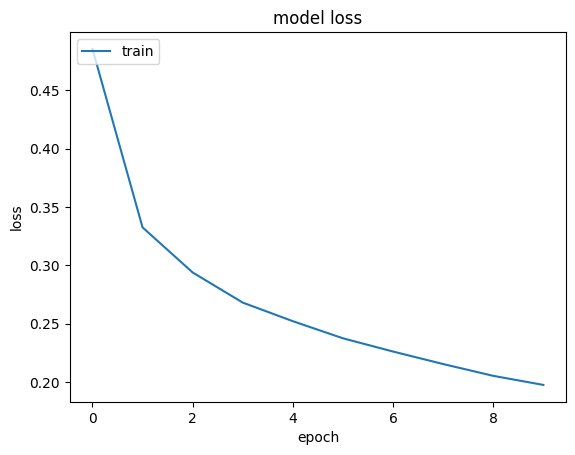

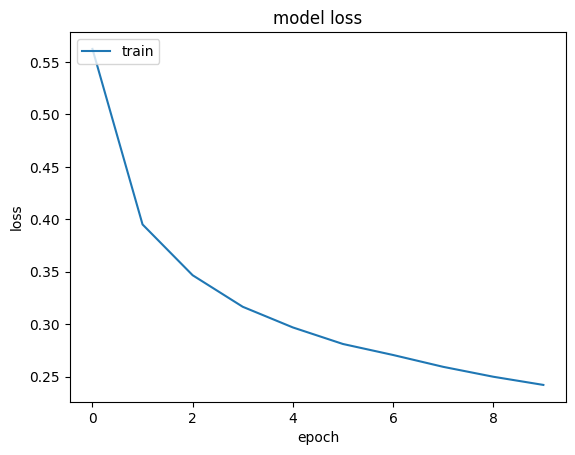

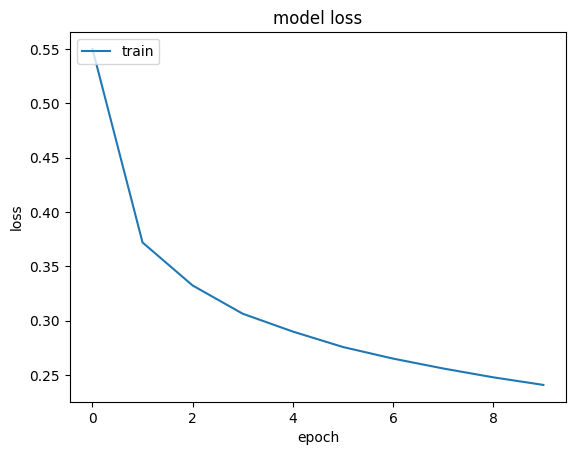

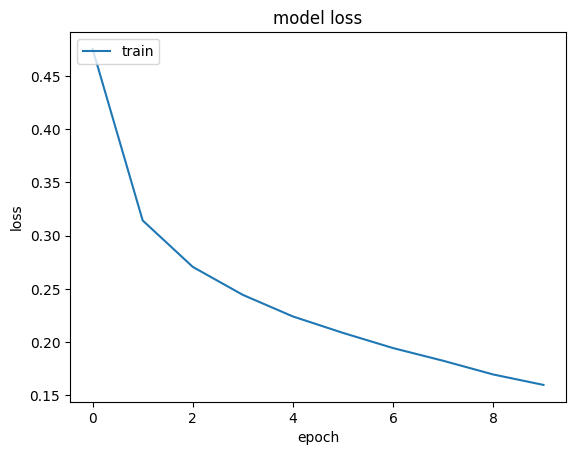

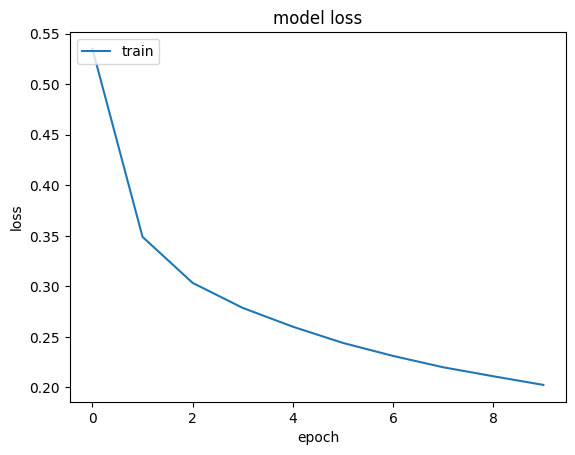

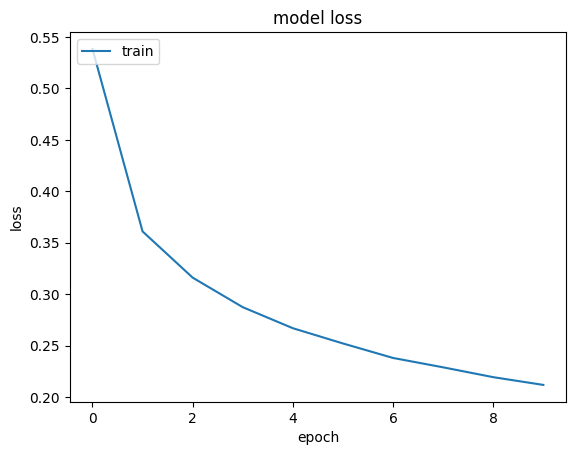

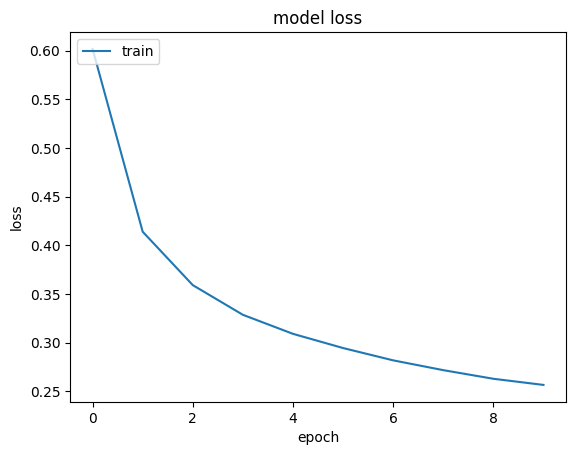

In [ ]:
# summarize history for loss
for h in history3:
  plt.plot(h.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
  plt.show()

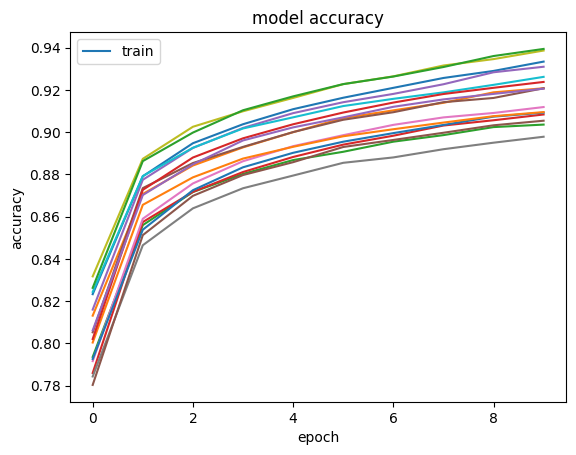

In [ ]:
# Combined graph for histroy2 accuracy
for h in history3:
  plt.plot(h.history['accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
plt.show()

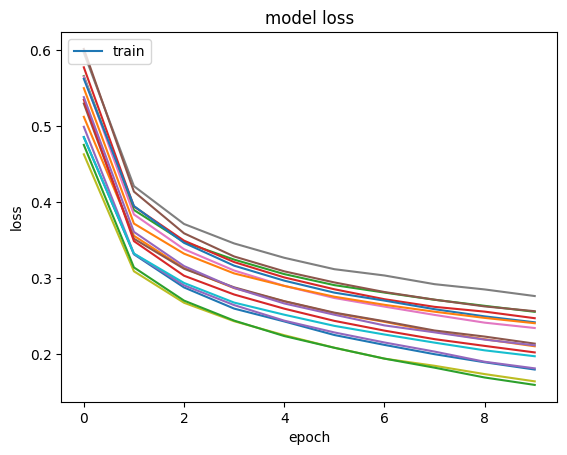

In [ ]:
# Combined graph for histroy2 loss
for h in history3:
  plt.plot(h.history['loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
base_model = keras.Sequential([
    keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"),
    keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', strides=1, padding = "valid"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"),
    keras.layers.Flatten(), 
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])
base_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
base_hist = base_model.fit(train_images, train_labels, epochs=10)
base_eval = base_model.evaluate(test_images, test_labels)

Epoch 1/10
1875/1875 [==============================] - 23s 5ms/step - loss: 0.4211 - accuracy: 0.8475
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2872 - accuracy: 0.8945
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2450 - accuracy: 0.9097
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2116 - accuracy: 0.9206
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1826 - accuracy: 0.9311
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1566 - accuracy: 0.9404
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1352 - accuracy: 0.9486
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1168 - accuracy: 0.9564
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1004 - accuracy: 0.9621
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.34

In [ ]:
pooled_models = []
pooled_hist = []
pooled_eval = []
pooling_sizes = [2, 3, 4, 5, 6]

In [ ]:
for p in pooling_sizes:
  model = keras.Sequential([
    keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(p, p), strides=(1, 1), padding="valid"),
    keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', strides=1, padding = "valid"),
    keras.layers.MaxPooling2D(pool_size=(p, p), strides=(1, 1), padding="valid"),
    keras.layers.Flatten(), 
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
  ])
  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  hist = model.fit(train_images, train_labels, epochs=10)
  pooled_hist.append(hist)
  eval = model.evaluate(test_images, test_labels)
  pooled_eval.append(eval)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4240 - accuracy: 0.8456
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2877 - accuracy: 0.8951
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2391 - accuracy: 0.9109
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2033 - accuracy: 0.9242
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1746 - accuracy: 0.9347
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1508 - accuracy: 0.9437
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1318 - accuracy: 0.9506
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1128 - accuracy: 0.9582
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0998 - accuracy: 0.9632
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3401

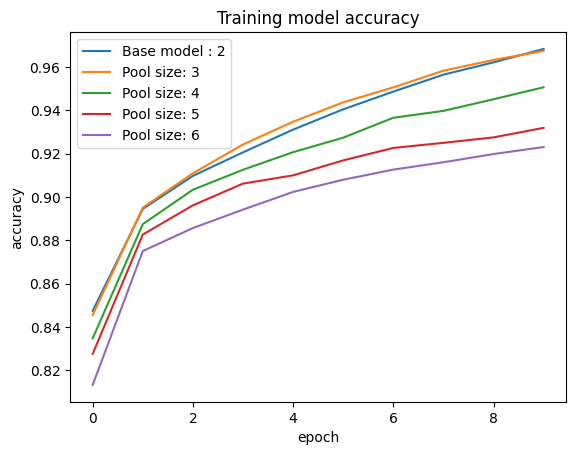

In [ ]:
plt.plot(base_hist.history['accuracy'], label='Base model : 2')
plt.title('Training model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
idx = 0
for i in pooling_sizes[1:]:
  plt.plot(pooled_hist[idx].history['accuracy'], label=f"Pool size: {i}")
  idx += 1
plt.legend(loc='upper left')
plt.show()

In [ ]:
print(base_eval, pooled_eval)

[0.34369635581970215, 0.90829998254776] [[0.340114563703537, 0.9121000170707703], [0.28881439566612244, 0.9111999869346619], [0.2750219702720642, 0.9052000045776367], [0.3001232147216797, 0.8985000252723694], [0.2956990599632263, 0.8962000012397766]]


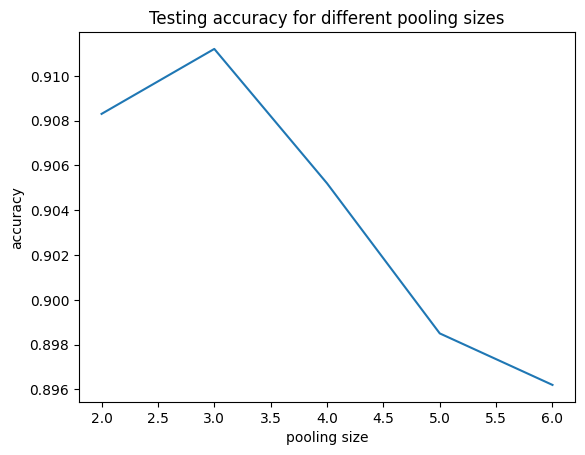

In [ ]:
acc = [x[1] for x in pooled_eval[1:]]
acc.insert(0, base_eval[1])
plt.plot(pooling_sizes, acc)
plt.title('Testing accuracy for different pooling sizes')
plt.ylabel('accuracy')
plt.xlabel('pooling size')
plt.show()

In [ ]:
strides = [1,2,3,4,5]
strides_eval = []
strides_hist = []
strides_models = []

In [ ]:
for s in strides:
  model = keras.Sequential([
    keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(s, s), padding="valid"),
    keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', strides=1, padding = "valid"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(s, s), padding="valid"),
    keras.layers.Flatten(), 
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
  ])
  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  hist = model.fit(train_images, train_labels, epochs=10)
  strides_hist.append(hist)
  eval = model.evaluate(test_images, test_labels)
  strides_eval.append(eval)
  strides_models.append(model)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4101 - accuracy: 0.8526
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2787 - accuracy: 0.8971
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2327 - accuracy: 0.9140
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1961 - accuracy: 0.9273
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1684 - accuracy: 0.9368
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1412 - accuracy: 0.9473
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1206 - accuracy: 0.9549
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1014 - accuracy: 0.9620
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0887 - accuracy: 0.9666
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.

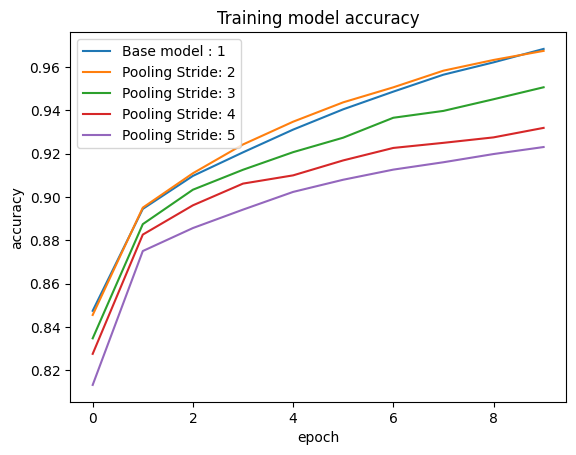

In [ ]:
plt.plot(base_hist.history['accuracy'], label='Base model : 1')
plt.title('Training model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
idx = 0
for i in strides[1:]:
  plt.plot(pooled_hist[idx].history['accuracy'], label=f"Pooling Stride: {i}")
  idx += 1
plt.legend(loc='upper left')
plt.show()

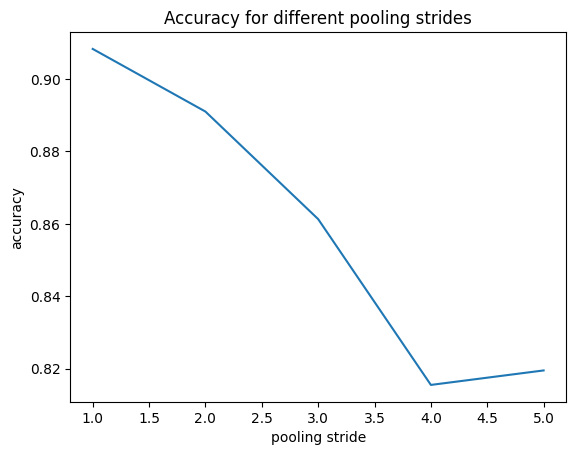

In [ ]:
acc = [x[1] for x in strides_eval[1:]]
acc.insert(0, base_eval[1])
plt.plot(strides, acc)
plt.title('Accuracy for different pooling strides')
plt.ylabel('accuracy')
plt.xlabel('pooling stride')
plt.show()